# Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generating data

In [2]:
n_class1 = 100
n_class2 = 50
n_class3 = 100

x1 = np.random.normal(loc=(2,0), scale=(1,1), size=(n_class1, 2))
x2 = np.random.normal(loc=(0,1), scale=(0.3,0.5), size=(n_class2, 2))
x3 = np.random.normal(loc=(-1,-1), scale=(1,0.2), size=(n_class3, 2))

X = np.concat([x1, x2, x3], axis = 0)
X_train, X_test = train_test_split(X, test_size=0.2)


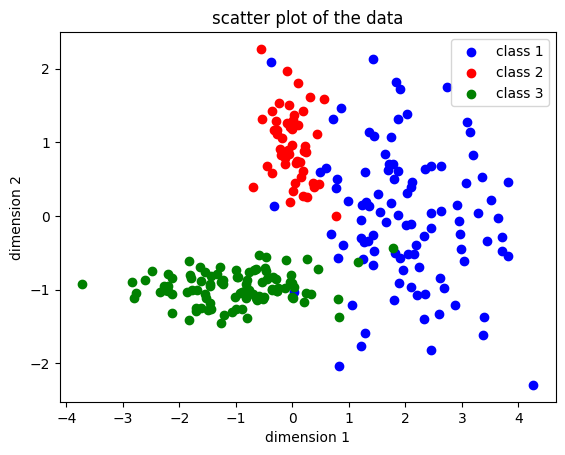

In [3]:
plt.figure()
plt.scatter(x1[:,0], x1[:,1], color="blue", label="class 1")
plt.scatter(x2[:,0], x2[:,1], color="red", label = "class 2")
plt.scatter(x3[:,0], x3[:,1], color="green", label = "class 3")
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("scatter plot of the data")
plt.legend()
plt.show()

# Defining the class

In [4]:
class K_means:
    def __init__(self, k):
        self.k = k 
        self.centroids = None
        
    def fit(self, X, steps=100, tol=1e-4):
        X = X.copy()
        self.centroids = np.random.randn(self.k, 2)
        assert type(self.centroids) == np.ndarray, f"centroids is of type type {type(self.centroids)}"
        cluster_y = np.random.randint(1, self.k + 1, size = X.shape[0])
        for i in range(steps):
            old_centroids = self.centroids.copy()
            for class_x in range(1, self.k + 1):
                mask_class =  cluster_y == class_x
                self.centroids[class_x - 1] = np.mean(X[mask_class], axis = 0)
                assert self.centroids[class_x - 1].shape[0] == 2, f'centroids {class_x} is of shape {self.centroids[class_x - 1].shape[0]}'
            
            shift = np.linalg.norm(self.centroids - old_centroids, axis=1).max()
            if shift < tol:
                break
            
            cluster_y = self.predict(X)
            
    def predict(self, X):
        y = []
        for x_i in X:
            distances = np.linalg.norm(self.centroids - x_i, axis=1)
            min_index = np.argmin(distances)
            assert min_index + 1 in [1,2,3], f"min index is {min_index}"
            y.append(min_index+1)
        return np.array(y)

    def wcss(self, X):
        y = self.predict(X)
        wcss_value = 0
        for cluster_index, cluster_c in enumerate(self.centroids):
            mask_c = y == cluster_index
            if not np.any(mask_c):
                continue
            wcss_value += float(np.mean((X[mask_c] - cluster_c)**2))
        return wcss_value





k_mean = K_means(3)
k_mean.fit(X_train)

y_predict = k_mean.predict(X_test)

k_mean.wcss(X_train)

9.350357218238795

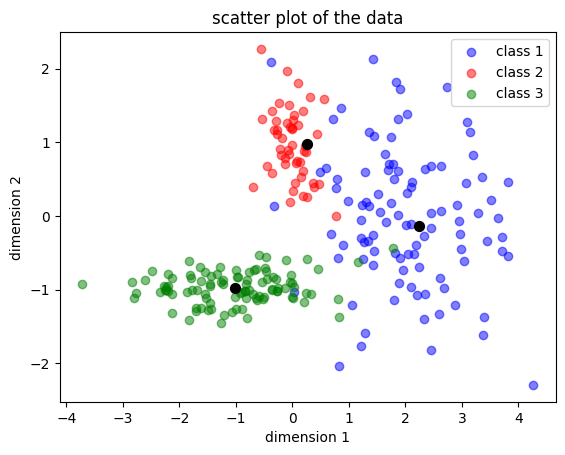

In [5]:
plt.figure()
plt.scatter(x1[:,0], x1[:,1], color="blue", label="class 1", alpha=0.5)
plt.scatter(x2[:,0], x2[:,1], color="red", label = "class 2",  alpha=0.5)
plt.scatter(x3[:,0], x3[:,1], color="green", label = "class 3", alpha=0.5)
plt.scatter(k_mean.centroids[:,0], k_mean.centroids[:,1], color= "black", s=50)
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("scatter plot of the data")
plt.legend()
plt.show()

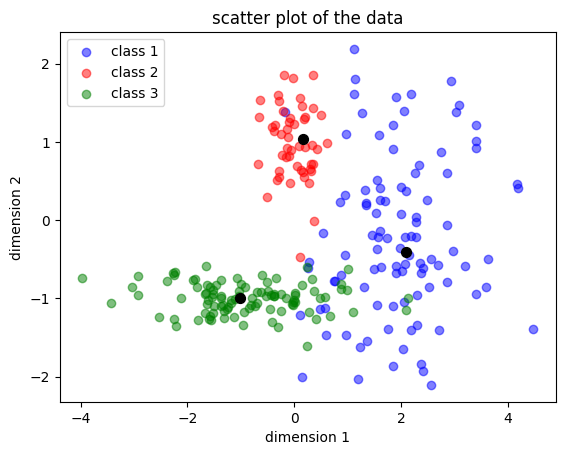

In [14]:
plt.figure()
plt.scatter(x1[:,0], x1[:,1], color="blue", label="class 1", alpha=0.5)
plt.scatter(x2[:,0], x2[:,1], color="red", label = "class 2",  alpha=0.5)
plt.scatter(x3[:,0], x3[:,1], color="green", label = "class 3", alpha=0.5)
plt.scatter(k_mean.centroids[:,0], k_mean.centroids[:,1], color= "black", s=50)
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.title("scatter plot of the data")
plt.legend()
plt.show()

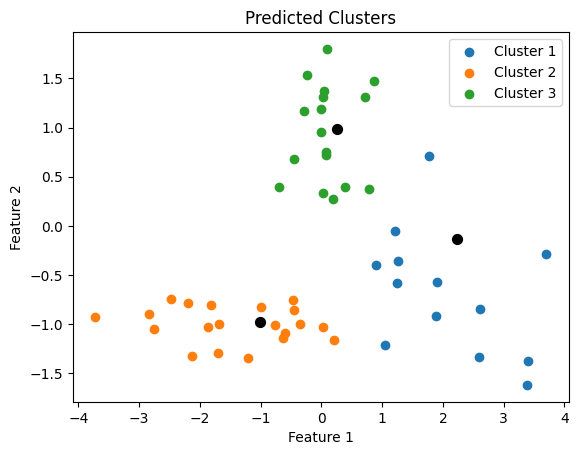

In [8]:
plt.scatter(k_mean.centroids[:,0], k_mean.centroids[:,1], color= "black", s=50)
for label in np.unique(y_predict):
    plt.scatter(
        X_test[y_predict == label, 0],
        X_test[y_predict == label, 1],
        label=f"Cluster {label}"
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Predicted Clusters")
plt.legend()
plt.show()